In [ ]:
# pip install split-folders

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten


In [ ]:

# import splitfolders
# input_folder='/content/drive/MyDrive/Colab Notebooks/project images'
# splitfolders.ratio(input_folder,output='/content/drive/MyDrive/Colab Notebooks/train_validaiton',
#                    seed=42,ratio=(.8,.2),group_prefix=None)

In [ ]:
# from keras.applications.vgg16 import VGG19
# conv_base = VGG19(
#     weights='imagenet',
#     include_top = False,
#     input_shape=(224,224,3)
# )


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (256, 256, 3),
                         include_top = False,
                         weights = 'imagenet')

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# base_model.trainable = True

# set_trainable = False

# for layer in base_model.layers:
#   if layer.name == 'block5_conv1':
#     set_trainable = True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False

# for layer in base_model.layers:
#   print(layer.name,layer.trainable)

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
from keras.layers.regularization.dropout import Dropout
model = Sequential()

model.add(base_model)
model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dense(132,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              75498496  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 97,307,430
Trainable params: 75,504,646
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
# train_dir='/content/drive/MyDrive/Colab Notebooks/train_validaiton/train'
# validation_dir='/content/drive/MyDrive/Colab Notebooks/train_validaiton/val'
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/project images',
    labels='inferred',
    label_mode = 'categorical',
    subset='training',
    validation_split=0.2,
    seed=1,
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/project images',
    labels='inferred',
    label_mode = 'categorical',
    subset='validation',
    validation_split=0.2,
    seed=1,
    batch_size=32,
    image_size=(256,256)
)

# from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2,
#                                    height_shift_range = 0.2, shear_range = 0.2,
#                                    zoom_range = 0.2, horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'categorical', target_size = (150, 150))

# validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'categorical', target_size = (150, 150))


Found 15133 files belonging to 6 classes.
Using 12107 files for training.
Found 15133 files belonging to 6 classes.
Using 3026 files for validation.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(train_ds, validation_data = validation_ds, epochs = 10)

Epoch 1/10
379/379 [==============================] - 2922s 7s/step - loss: 4.1915 - acc: 0.2425 - val_loss: 1.6960 - val_acc: 0.2826
Epoch 2/10
379/379 [==============================] - 54s 141ms/step - loss: 1.6505 - acc: 0.3149 - val_loss: 1.6405 - val_acc: 0.2931
Epoch 3/10
379/379 [==============================] - 53s 138ms/step - loss: 1.5915 - acc: 0.3248 - val_loss: 1.5930 - val_acc: 0.3546
Epoch 4/10
379/379 [==============================] - 52s 137ms/step - loss: 1.5142 - acc: 0.3803 - val_loss: 1.6231 - val_acc: 0.3430
Epoch 5/10
379/379 [==============================] - 52s 136ms/step - loss: 1.4501 - acc: 0.4010 - val_loss: 1.6368 - val_acc: 0.3685
Epoch 6/10
379/379 [==============================] - 53s 138ms/step - loss: 1.3888 - acc: 0.4243 - val_loss: 1.7051 - val_acc: 0.3668
Epoch 7/10
379/379 [==============================] - 53s 139ms/step - loss: 1.3362 - acc: 0.4473 - val_loss: 1.6350 - val_acc: 0.3681
Epoch 8/10
379/379 [==============================] - 53

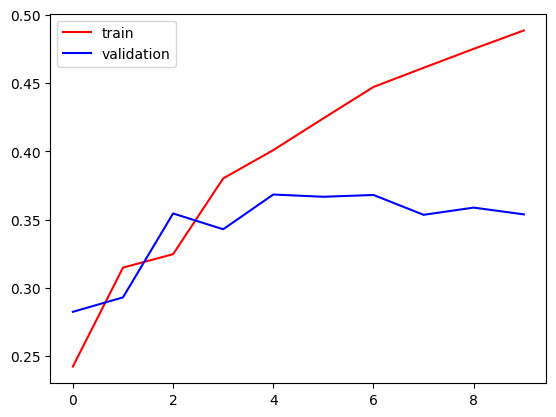

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'],color='red',label='train')
plt.plot(history.history['val_acc'],color='blue',label='validation')
plt.legend()
plt.show()